In [1]:
# Reed Whitcraft
# Mod 02 Final Project

# Table of Contents
***

    1. Observation
    2. Examine Research
    3. Form Hypothesis
    4. Conduct Experiment
    5. Analyze Experimental Results
    6. Draw Conclusions

# Lab Links
***
- [Querying with SQLAlchemy](https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-15-an-introduction-to-orms/querying-with-sqlalchemy)
- [Querying with SQLAlchemy - Lab (Solution)](https://github.com/learn-co-students/dsc-2-13-11-queries-with-sqlalchemy-lab-online-ds-ft-021119/tree/solution)
- [Using an ORM](https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-15-an-introduction-to-orms/using-an-orm)
- [Using an ORM - Lab (Solution)](https://github.com/learn-co-students/dsc-2-13-08-using-an-orm-lab-online-ds-ft-021119/tree/solution)
- [Using Sqlite - Lab (Solution)](https://github.com/learn-co-students/dsc-2-13-04-review-using-sqlite-lab-online-ds-ft-021119/tree/solution)
- [Nested Queries with SQLAlchemy](https://blog.miguelgrinberg.com/post/nested-queries-with-sqlalchemy-orm)
- [Two Sample T-Test - Lab (Solution)](https://github.com/learn-co-students/dsc-2-20-09-2-sample-t-tests-lab-online-ds-ft-021119/tree/solution)
- [Learn.co - Effect Size (Cohen d)](https://learn.co/tracks/data-science-career-v1-1/module-2-advanced-data-retrieval-and-analysis/section-20-hypothesis-and-ab-testing/effect-sizes)


# Database Details

<table>
    <thead>
        <tr>
            <th>Table Name</th>
            <th>Primary Key</th>
            <th>Foreign Key(s)</th>
            <th>Count</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>Product</td><td>d</td><td>d</td><td>77</td></tr>
        <tr><td>Category</td><td>d</td><td>d</td><td>8</td></tr>
        <tr><td>Order</td><td>d</td><td>d</td><td>830</td></tr>
        <tr><td>OrderDetail</td><td>d</td><td>d</td><td>2155</td></tr>
        <tr><td>Customer</td><td>d</td><td>d</td><td>91</td></tr>
    </tbody>
</table>

In [18]:
# import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import sqlalchemy
import sqlite3 as sql
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect
from ipywidgets import interact, interactive

In [4]:
# helper methods :)

def effect_size_blurb(effect_size):
    e_size = ""
    if effect_size <= 0.20:
        e_size = "small"
    elif effect_size >0.20 and effect_size <=0.50:
        e_size = "small/medium"
    elif effect_size > 0.50 and effect_size <=0.80:
        e_size = "medium/large"
    elif effect_size > 0.80 and effect_size <=1.20:
        e_size = "large/very large"
    else:
        e_size = "huge" 
        
    init = "Effect size is a measurement of the strength of a relationship between two variables on a numeric scale, and Cohen's d calculates this as the difference between two means divided by a standard deviation for the combined data. "
    init2 = "Generally, 0.01 is considered very small, 0.20 small, 0.50 medium, 0.80 large, 1.20 very large, and 2.0 huge. "
    init3 = "Typically, a lower Cohen's d score indicates the need for larger sample sizes. "
    init4 = "With a cohen's d value of " + str(round(effect_size, 3)) + ", we can say that the effect size is " + e_size
    
    return init + init2 + init3 + init4
    
    

In [5]:
# Open a connection to the sql server. I'll use sqlite3 for now, but I may switch to another sql module later if I need it.
connect = sql.connect('Northwind_small.sqlite')
c = connect.cursor()
# Get table names
raw = c.execute("""select name from sqlite_master where type = 'table'""").fetchall()
tables = []
for table in raw:
    tables.append(table[0])

In [6]:
@interact
def table_preview(Table = tables, Preview = ['Head','Description', 'Shape','Unique','Types']):
    statement = "SELECT * FROM [" + Table + "]"
    df = pd.read_sql_query(statement, connect)
    preview_return = {'Head':df.head(10), 'Description':df.describe(), 
                      'Shape':df.shape, 'Unique':df.nunique(axis = 0), 'Types':df.dtypes}
    out = preview_return[Preview]
    return out

interactive(children=(Dropdown(description='Table', options=('Employee', 'Category', 'Customer', 'Shipper', 'S…

In [7]:
# connecting to database
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)
print(inspector.get_table_names()) # print table names

2019-04-02 14:31:06,723 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-02 14:31:06,724 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:06,725 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-02 14:31:06,726 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:06,728 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-02 14:31:06,729 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


In [8]:
from sqlalchemy.sql import func

In [9]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base

metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata=metadata)
Base.prepare()

2019-04-02 14:31:07,023 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-02 14:31:07,024 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,027 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-02 14:31:07,028 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,030 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-02 14:31:07,030 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,032 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-04-02 14:31:07,033 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,033 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-02 14:31:07,034 INFO sqlalchemy.engine.base.Engin

2019-04-02 14:31:07,111 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-04-02 14:31:07,111 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,113 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-04-02 14:31:07,114 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,115 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-02 14:31:07,115 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,117 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-02 14:31:07,118 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,119 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-04-02 14:31:07,120 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,121 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-04-02 14:31:07,189 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-04-02 14:31:07,190 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,192 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-02 14:31:07,192 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,194 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-04-02 14:31:07,195 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,196 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-02 14:31:07,196 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,197 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-04-02 14:31:07,198 INFO sqlalchemy.engine.base.Engine ()
2019-04-02 14:31:07,199 INFO 

In [10]:
# Mapping to classes
Employee, Customer = Base.classes.Employee, Base.classes.Customer
Product, Category = Base.classes.Product, Base.classes.Category
Order, OrderDetail = Base.classes.Order, Base.classes.OrderDetail

## 3.1 Hypothesis Test 01

### Question: Do discounts increase the overall order size?

Economically, there is a negative relationship between price and demand - as price goes up, demand falls, and as price goes down, demand rises.  For this case study, I will look to see if the presence of discounts (decrease in price) increases the overall order size (quantity demanded) by comparing the average total quantities ordered in two groups - (1) Orders that have at least one item discounted (Discounted), and (2) Orders that contain no discounted items (Undiscounted).

Formally,

#### Null Hypothesis

>**Ho:** Discounted Mean Quantity Ordered = Undiscounted Mean Quantity Ordered

#### Alternate Hypothesis

>**Ha:** Discounted Mean Quantity Ordered > Undiscounted Mean Quantity Ordered

First, we have to query our database - aggregating the OrderDetails (line items) for each Order, and separating discounted and undiscounted orders.

In [49]:
# query OrderDetail => grouped (aggregated) by Order (Orders have many OrderDetails)
# sum quantities across OrderDetail that belong to same Order
# find MaxDiscount that belong to same Order (to determine non-discounted orders, which will = 0)
subquery = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query = session.query(subquery).filter(subquery.c.MaxDiscount > 0).group_by(subquery.c.OrderId)
undiscounted_orders = pd.read_sql(query.statement, engine) # 450

# same as query above, *EXCEPT* filtering for MaxDiscount == 0
# this way, we have orders that have no items with discounts
subquery2 = session.query(OrderDetail, 
                         func.sum(OrderDetail.Quantity).label("TotalQuantity"), 
                         func.max(OrderDetail.Discount).label("MaxDiscount"), 
                         func.min(OrderDetail.Discount).label("MinDiscount")
                        ).group_by(OrderDetail.OrderId).subquery()

query2 = session.query(subquery2).filter(subquery2.c.MaxDiscount == 0).group_by(subquery2.c.OrderId)
discounted_orders = pd.read_sql(query2.statement, engine) # 380

2019-04-02 17:34:40,373 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", anon_1."UnitPrice", anon_1."Quantity", anon_1."Discount", anon_1."TotalQuantity", anon_1."MaxDiscount", anon_1."MinDiscount" 
FROM (SELECT "OrderDetail"."Id" AS "Id", "OrderDetail"."OrderId" AS "OrderId", "OrderDetail"."ProductId" AS "ProductId", "OrderDetail"."UnitPrice" AS "UnitPrice", "OrderDetail"."Quantity" AS "Quantity", "OrderDetail"."Discount" AS "Discount", sum("OrderDetail"."Quantity") AS "TotalQuantity", max("OrderDetail"."Discount") AS "MaxDiscount", min("OrderDetail"."Discount") AS "MinDiscount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."OrderId") AS anon_1 
WHERE anon_1."MaxDiscount" > ? GROUP BY anon_1."OrderId"
2019-04-02 17:34:40,374 INFO sqlalchemy.engine.base.Engine (0,)
2019-04-02 17:34:40,389 INFO sqlalchemy.engine.base.Engine SELECT anon_1."Id", anon_1."OrderId", anon_1."ProductId", anon_1."UnitPrice", anon_1."Quantity", anon_1."Discount", anon_1."

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


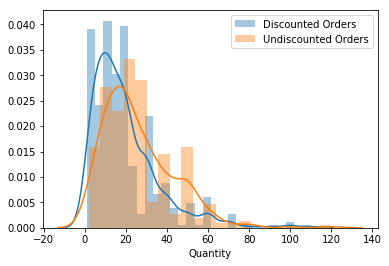

In [51]:
# Take a look at the distributions of these orders' quantities
sns.distplot(discounted_orders.Quantity, label="Discounted Orders")
sns.distplot(undiscounted_orders.Quantity, label="Undiscounted Orders")
plt.legend()

In [52]:
# Normalize the orders because hypothesis test has this as an assumption
log_undiscounted = np.log(undiscounted_orders.Quantity)
log_discounted = np.log(discounted_orders.Quantity)
undiscounted_orders.Quantity = log_undiscounted
discounted_orders.Quantity = log_discounted

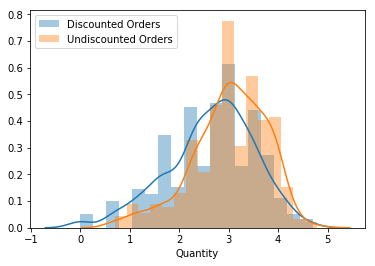

In [53]:
# Second look at the distributions
sns.distplot(discounted_orders.Quantity, label="Discounted Orders")
sns.distplot(undiscounted_orders.Quantity, label="Undiscounted Orders")
plt.legend()

In [54]:
# helper method to measure effect size
# represents the magnitude of differences between two groups on a given variable
# with larger values representing a greater differentation between two groups on that variable

def pooled_var(group1, group2, col_name):
    n1, n2 = len(group1), len(group2)
    var1 = group1[col_name].var()
    var2 = group2[col_name].var()
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    return pooled_var

# for calculating effect size
def cohens_d(group1, group2, col_name):
    diff = group1[col_name].mean() - group2[col_name].mean()
    
    # calculate pooled threshold
    pooled_v = pooled_var(group1, group2, col_name)
    
    # calculate cohen's d statistic
    d = diff / np.sqrt(pooled_v)
    
    return d

In [55]:
from statsmodels.stats.weightstats import ttest_ind
# import scipy.stats

tstat, pvalue, df = ttest_ind(undiscounted_orders.Quantity, discounted_orders.Quantity, alternative='larger')

# calculate pooled variance
pooled_v = pooled_var(undiscounted_orders, discounted_orders, "Quantity")
# calculate effect size using cohen's d
cohen_d = cohens_d(undiscounted_orders, discounted_orders, "Quantity")

print('p-value = {0:1.3e}'.format(pvalue))
print('t-stat = {0:1.3f}'.format(tstat))
print('cohen d = {0:1.3f}'.format(cohen_d))

e = effect_size_blurb(cohen_d)

p-value = 1.122e-10
t-stat = 6.423
cohen d = 0.448


Given the p-value of {{pvalue}}, which is < our set significance level of 0.05, and the t-statistic of {{tstat}}, we can confidently reject the null hypothesis in favor of our alternative hypothesis.  That is, we can say that the average quantity order of discounted orders and undiscounted orders are not the same, and discounted orders have a higher average quantity of items.  

{{e}}

    - 380 Orders without discounts
    - 450 Orders with discounts
    - 830 Orders Total

In [23]:
q = session.query(OrderDetail).filter(OrderDetail.Discount > 0)
df = pd.read_sql(q.statement, engine)
df.head()

2019-04-01 17:40:04,286 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" > ?
2019-04-01 17:40:04,287 INFO sqlalchemy.engine.base.Engine (0,)


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10250/51,10250,51,42.4,35,0.15
1,10250/65,10250,65,16.8,15,0.15
2,10251/22,10251,22,16.8,6,0.05
3,10251/57,10251,57,15.6,15,0.05
4,10252/20,10252,20,64.8,40,0.05


In [69]:
q = session.query(OrderDetail).filter(OrderDetail.Discount == 0).group_by(OrderDetail.OrderId)
df = pd.read_sql(q.statement, engine)
print(len(df))
df.head()

2019-04-01 19:53:32,030 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount" 
FROM "OrderDetail" 
WHERE "OrderDetail"."Discount" = ? GROUP BY "OrderDetail"."OrderId"
2019-04-01 19:53:32,031 INFO sqlalchemy.engine.base.Engine (0,)
613


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10249/14,10249,14,18.6,9,0.0
2,10250/41,10250,41,7.7,10,0.0
3,10251/65,10251,65,16.8,20,0.0
4,10252/60,10252,60,27.2,40,0.0


In [67]:
order_ids_no_discounts = df.OrderId.tolist()
order_ids_no_discounts

q = session.query(OrderDetail).filter(~OrderDetail.OrderId.in_(order_ids_no_discounts)).group_by(OrderDetail.OrderId)
df = pd.read_sql(q.statement, engine)
print(len(df))
df.head()


2019-04-01 19:53:12,795 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount" 
FROM "OrderDetail" 
WHERE "OrderDetail"."OrderId" NOT IN (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?,

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10249/14,10249,14,18.6,9,0.0
2,10253/31,10253,31,10.0,20,0.0
3,10255/2,10255,2,15.2,20,0.0
4,10256/53,10256,53,26.2,15,0.0


In [26]:
q = session.query(OrderDetail).group_by(OrderDetail.OrderId)
df = pd.read_sql(q.statement, engine)
df.head()

2019-04-01 17:45:38,317 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."OrderId"
2019-04-01 17:45:38,318 INFO sqlalchemy.engine.base.Engine ()


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.00
1,10249/14,10249,14,18.6,9,0.00
2,10250/41,10250,41,7.7,10,0.00
3,10251/22,10251,22,16.8,6,0.05
4,10252/20,10252,20,64.8,40,0.05


In [50]:
q = session.query(OrderDetail, func.count(OrderDetail.OrderId).label("OCount"), func.sum(OrderDetail.Quantity).label("TotalQuantity"), func.sum(OrderDetail.Discount).label("TotalDiscount")).group_by(OrderDetail.OrderId)
df = pd.read_sql(q.statement, engine)
df.head()
# df.TotalDiscount.value_counts()
# df.OCount.value_counts()
df.OCount.value_counts()

2019-04-01 19:17:08,962 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount", count("OrderDetail"."OrderId") AS "OCount", sum("OrderDetail"."Quantity") AS "TotalQuantity", sum("OrderDetail"."Discount") AS "TotalDiscount" 
FROM "OrderDetail" GROUP BY "OrderDetail"."OrderId"
2019-04-01 19:17:08,963 INFO sqlalchemy.engine.base.Engine ()


2     283
3     248
1     137
4     125
5      33
6       3
25      1
Name: OCount, dtype: int64

In [41]:
q = session.query(OrderDetail, Order., func.sum(OrderDetail.Quantity).label("TotalQuantity"), func.sum(OrderDetail.Discount).label("TotalDiscount")).group_by(OrderDetail.OrderId)
df = pd.read_sql(q.statement, engine)
df.head()

2019-04-01 18:36:16,051 INFO sqlalchemy.engine.base.Engine SELECT "OrderDetail"."Id", "OrderDetail"."OrderId", "OrderDetail"."ProductId", "OrderDetail"."UnitPrice", "OrderDetail"."Quantity", "OrderDetail"."Discount", "Order"."Id", "Order"."CustomerId", "Order"."EmployeeId", "Order"."OrderDate", "Order"."RequiredDate", "Order"."ShippedDate", "Order"."ShipVia", "Order"."Freight", "Order"."ShipName", "Order"."ShipAddress", "Order"."ShipCity", "Order"."ShipRegion", "Order"."ShipPostalCode", "Order"."ShipCountry", sum("OrderDetail"."Quantity") AS "TotalQuantity", sum("OrderDetail"."Discount") AS "TotalDiscount" 
FROM "OrderDetail", "Order" GROUP BY "OrderDetail"."OrderId"
2019-04-01 18:36:16,053 INFO sqlalchemy.engine.base.Engine ()


/anaconda3/lib/python3.7/site-packages/sqlalchemy/sql/base.py:527: SAWarning: Column 'Id' on table <sqlalchemy.sql.selectable.Select at 0x1a1fd35a90; Select object> being replaced by Column('Id', INTEGER(), table=<Select object>, primary_key=True, nullable=False), which has the same key.  Consider use_labels for select() statements.
  (key, getattr(existing, 'table', None), value))


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Id,CustomerId,EmployeeId,OrderDate,...,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,TotalQuantity,TotalDiscount
0,10248/11,10248,11,14.0,12,0.00,10248,VINET,5,2012-07-04,...,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,22410,0.0
1,10249/14,10249,14,18.6,9,0.00,10248,VINET,5,2012-07-04,...,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,40670,0.0
2,10250/41,10250,41,7.7,10,0.00,10248,VINET,5,2012-07-04,...,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,49800,249.0
3,10251/22,10251,22,16.8,6,0.05,10248,VINET,5,2012-07-04,...,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,34030,83.0
4,10252/20,10252,20,64.8,40,0.05,10248,VINET,5,2012-07-04,...,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,87150,83.0


In [38]:
q = session.query(Product)
df = pd.read_sql(q.statement, engine)
df.head()
len(df)

2019-04-01 18:31:17,697 INFO sqlalchemy.engine.base.Engine SELECT "Product"."Id", "Product"."ProductName", "Product"."SupplierId", "Product"."CategoryId", "Product"."QuantityPerUnit", "Product"."UnitPrice", "Product"."UnitsInStock", "Product"."UnitsOnOrder", "Product"."ReorderLevel", "Product"."Discontinued" 
FROM "Product"
2019-04-01 18:31:17,698 INFO sqlalchemy.engine.base.Engine ()


77

In [6]:
# helper methods
def get_columns_info(col_name):
    cols_list = inspector.get_columns(col_name)
    print("Table Name: {}".format(col_name))
    print("")
    for column in cols_list:
        print("Name: {} \t\t Type: {}".format(column['name'], column['type']))

In [7]:
# get_columns_info('Order')

In [8]:
# get_columns_info('Orderdetail')

In [9]:
# get_columns_info('Product')

In [10]:
# get_columns_info('Category')

In [90]:
q = '''SELECT unitprice, quantity, discount from orderdetail'''
df = pd.read_sql_query(q, engine)
df.describe()

2019-04-01 13:41:47,908 INFO sqlalchemy.engine.base.Engine SELECT unitprice, quantity, discount from orderdetail
2019-04-01 13:41:47,909 INFO sqlalchemy.engine.base.Engine ()


,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000
mean,26.218520,23.812993,0.056167
std,29.827418,19.022047,0.083450
min,2.000000,1.000000,0.000000
25%,12.000000,10.000000,0.000000
50%,18.400000,20.000000,0.000000
75%,32.000000,30.000000,0.100000
max,263.500000,130.000000,0.250000


In [91]:
df.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

In [88]:
no_discount_q = '''SELECT SUM(quantity) as total_quantity, OrderId FROM Orderdetail JOIN [Order] on Orderdetail.OrderId = "Order".Id WHERE Orderdetail.discount > 0 GROUP BY Orderdetail.OrderId ORDER BY total_quantity DESC'''
df = pd.read_sql_query(no_discount_q, engine)
df.head()

2019-04-01 13:34:48,396 INFO sqlalchemy.engine.base.Engine SELECT SUM(quantity) as total_quantity, OrderId FROM Orderdetail JOIN [Order] on Orderdetail.OrderId = "Order".Id WHERE Orderdetail.discount > 0 GROUP BY Orderdetail.OrderId ORDER BY total_quantity DESC
2019-04-01 13:34:48,397 INFO sqlalchemy.engine.base.Engine ()


,total_quantity,OrderId
0,288,10847
1,260,11030
2,238,10451
3,215,10595
4,211,10324


In [97]:
q = '''SELECT * FROM orderdetail WHERE OrderId = 11030'''
df = pd.read_sql_query(q, engine)
df.Discount.value_counts()

2019-04-01 14:05:57,974 INFO sqlalchemy.engine.base.Engine SELECT * FROM orderdetail WHERE OrderId = 11030
2019-04-01 14:05:57,975 INFO sqlalchemy.engine.base.Engine ()


0.25    3
0.00    1
Name: Discount, dtype: int64

In [109]:
q = '''SELECT product.Id, product.ProductName, product.CategoryId, product.UnitPrice as ProductUnitPrice, Orderdetail.OrderId, Orderdetail.ProductId, Orderdetail.UnitPrice, Orderdetail.Quantity, Orderdetail.Discount FROM PRODUCT JOIN ORDERDETAIL ON product.Id = OrderDetail.ProductId'''
df = pd.read_sql_query(q, engine)
df.head()
df.describe()

2019-04-01 14:19:15,776 INFO sqlalchemy.engine.base.Engine SELECT product.Id, product.ProductName, product.CategoryId, product.UnitPrice as ProductUnitPrice, Orderdetail.OrderId, Orderdetail.ProductId, Orderdetail.UnitPrice, Orderdetail.Quantity, Orderdetail.Discount FROM PRODUCT JOIN ORDERDETAIL ON product.Id = OrderDetail.ProductId
2019-04-01 14:19:15,777 INFO sqlalchemy.engine.base.Engine ()


,Id,CategoryId,ProductUnitPrice,OrderId,ProductId,UnitPrice,Quantity,Discount
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,40.793039,4.135499,27.948687,10659.375870,40.793039,26.218520,23.812993,0.056167
std,22.159019,2.378567,31.610706,241.378032,22.159019,29.827418,19.022047,0.083450
min,1.000000,1.000000,2.500000,10248.000000,1.000000,2.000000,1.000000,0.000000
25%,22.000000,2.000000,12.500000,10451.000000,22.000000,12.000000,10.000000,0.000000
50%,41.000000,4.000000,19.450000,10657.000000,41.000000,18.400000,20.000000,0.000000
75%,60.000000,6.000000,34.000000,10862.500000,60.000000,32.000000,30.000000,0.100000
max,77.000000,8.000000,263.500000,11077.000000,77.000000,263.500000,130.000000,0.250000


In [79]:
# df = pd.read_sql_query('''SELECT * FROM orderdetail GROUP BY OrderId''', engine)
# df = pd.read_sql_query('''SELECT * FROM "order"''', engine)
# df.head(30)
q = '''SELECT COUNT(ProductId) FROM Product JOIN Orderdetail on product.Id = Orderdetail.ProductId GROUP BY orderdetail.OrderId'''

df = pd.read_sql_query(q, engine)
df.head(50)

2019-03-31 19:58:26,827 INFO sqlalchemy.engine.base.Engine SELECT COUNT(ProductId) FROM Product JOIN Orderdetail on product.Id = Orderdetail.ProductId GROUP BY orderdetail.OrderId
2019-03-31 19:58:26,828 INFO sqlalchemy.engine.base.Engine ()


,COUNT(ProductId)
0,3
1,2
2,3
3,3
4,3
5,3
6,3
7,4
8,2
9,3


In [41]:
# conn = sqlite3.connect('Northwind_small.sqlite')
# c = conn.cursor()

# def query_all_table(table_name):
#     sql_string = "SELECT * FROM " + table_name
#     all_rows = c.execute(sql_string).fetchall()
#     print("The number of {} is {}".format(table_name, len(all_rows)))
#     return all_rows

# def query_and_fetch(sql_string):
#     return c.execute(sql_string).fetchall()

In [46]:
# products = query_all_table('product')
# categories = query_all_table('category')
# orders = query_all_table("'order'")
# order_details = query_all_table('orderdetail')
# customers = query_all_table('customer')

The number of product is 77
The number of category is 8
The number of 'order' is 830
The number of orderdetail is 2155
The number of customer is 91
